## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import tensorflow.keras as keras

# 請嘗試設定 GPU：os.environ


/Users/ttyoung/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [5]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test


In [6]:
x_train.max()

255

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    max_val = x.max()
    min_val = x.min()
    mean_val = x.mean()
    x = (x - mean_val) / (max_val - min_val)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
x_train

array([[-0.24199045, -0.23022575, -0.22630418, ...,  0.00898994,
        -0.11257869, -0.19101006],
       [ 0.13055857,  0.22075465,  0.25997033, ...,  0.08742131,
         0.04820563,  0.09134288],
       [ 0.526637  ,  0.526637  ,  0.526637  , ..., -0.15963751,
        -0.1361081 , -0.14395124],
       ...,
       [-0.3361081 ,  0.22467622,  0.44820563, ..., -0.42630418,
        -0.35179437, -0.27728457],
       [ 0.26781347,  0.35408798,  0.46781347, ...,  0.29134288,
         0.27173504,  0.19722523],
       [ 0.42467622,  0.42467622,  0.4638919 , ...,  0.16585269,
         0.16585269,  0.15800955]])

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:],num_neurons=[512, 256, 256, 128, 128])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [16]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
x_train = x_train[:5000]
x_test = x_test[:5000]
y_train = y_train[:5000]
y_test = y_test[:5000]

In [18]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 2s 492us/step - loss: 2.0443 - acc: 0.2630 - val_loss: 1.8696 - val_acc: 0.3172
Epoch 2/100
5000/5000 [==============================] - 1s 270us/step - loss: 1.7053 - acc: 0.3836 - val_loss: 1.7420 - val_acc: 0.3816
Epoch 3/100
5000/5000 [==============================] - 1s 241us/step - loss: 1.5391 - acc: 0.4534 - val_loss: 1.7124 - val_acc: 0.3970
Epoch 4/100
5000/5000 [==============================] - 1s 252us/step - loss: 1.3831 - acc: 0.5212 - val_loss: 1.7449 - val_acc: 0.4046
Epoch 5/100
5000/5000 [==============================] - 1s 286us/step - loss: 1.2311 - acc: 0.5626 - val_loss: 1.6854 - val_acc: 0.4318
Epoch 6/100
5000/5000 [==============================] - 1s 269us/step - loss: 1.0743 - acc: 0.6312 - val_loss: 1.7439 - val_acc: 0.4232
Epoch 7/100
5000/5000 [==============================] - 1s 266us/step - loss: 0.9434 - acc: 0.6770 - val_loss: 1.8375 - val_acc: 

5000/5000 [==============================] - 1s 216us/step - loss: 0.0065 - acc: 0.9982 - val_loss: 4.8679 - val_acc: 0.4452
Epoch 61/100
5000/5000 [==============================] - 1s 274us/step - loss: 0.0041 - acc: 0.9988 - val_loss: 4.8770 - val_acc: 0.4308
Epoch 62/100
5000/5000 [==============================] - 1s 263us/step - loss: 0.0057 - acc: 0.9976 - val_loss: 4.9726 - val_acc: 0.4406
Epoch 63/100
5000/5000 [==============================] - 1s 224us/step - loss: 0.0241 - acc: 0.9938 - val_loss: 5.1359 - val_acc: 0.4144
Epoch 64/100
5000/5000 [==============================] - 1s 238us/step - loss: 0.0567 - acc: 0.9814 - val_loss: 4.8670 - val_acc: 0.4204
Epoch 65/100
5000/5000 [==============================] - 1s 208us/step - loss: 0.1169 - acc: 0.9632 - val_loss: 4.5243 - val_acc: 0.4134
Epoch 66/100
5000/5000 [==============================] - 1s 208us/step - loss: 0.1634 - acc: 0.9496 - val_loss: 4.0790 - val_acc: 0.4148
Epoch 67/100
5000/5000 [=======================

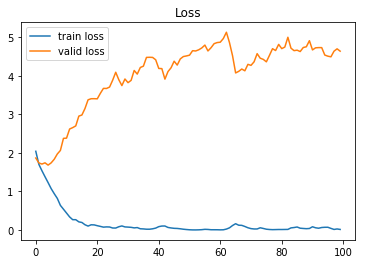

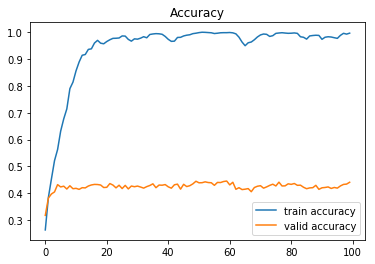

In [19]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()